***Задача***

В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.

***Задание***

1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [18]:
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn.neighbors as neighbors

In [2]:
server_location = (7,13)
computers_number = 100
optical_fiber_price = 12     # rubles per metre (to connect routers with the server)
t_wire_price = 30            # rubles per metre (to connect PCs with routers)
routers_ports_number = 8     # (to connect PCs with routers)
computers_location = []

#computers location
for i in range(computers_number):
    
    h = 2
    v = 2
    
    if i == 0:
        x = np.random.randint(1,30)
        y = np.random.randint(1,30)
             
    elif i%3 == 0:
        y = y + v
        x = x - 2*h
        
    else:
        x = x + h
    
    computers_location.append((x, y))
        
    
computers_location = np.array(computers_location)

**Option #1**

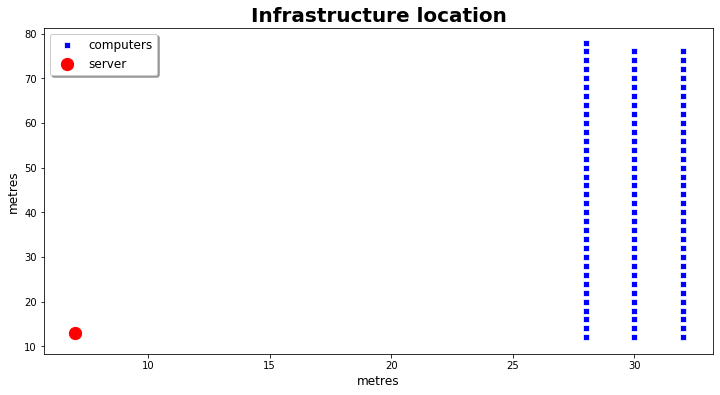

In [11]:
#Vizualize 
plt.figure(figsize = (12,6))
sns.scatterplot(x=computers_location.T[0], y=computers_location.T[1], color = 'b', label = "computers",marker="s")
plt.scatter(server_location[0], server_location[1], color = 'r', label = "server", s=150)
plt.title("Infrastructure location", fontweight='bold', fontsize= 20 )
plt.legend(shadow=True, fontsize= 12)
plt.xlabel("metres",fontsize= 12)
plt.ylabel("metres",fontsize= 12)
plt.show()

In [49]:
price_without_routers = 0

for x,y in computers_location:
    distance = np.sqrt(((server_location[0]-x)**2)+((server_location[1]-y)**2))
    price_without_routers += distance * t_wire_price

print(f'Стоимость подключения компьютеров напрямую = {round(price_without_routers,0)} руб.') 

Стоимость подключения компьютеров напрямую = 122891.0 руб.


**Option #2**

In [111]:
routers_number = math.ceil(computers_number/routers_ports_number)
routers_number

13

In [112]:
first_coordinate = computers_location[0]
routers_location = []

for i in range(computers_number):
    if i % routers_ports_number == 0:
        x = server_location
        y = computers_location[i]
        
        routers_location.append(((x[0]+y[0])/1.5, (x[1]+y[1])/1.5))
        
    
routers_location = np.array(routers_location)

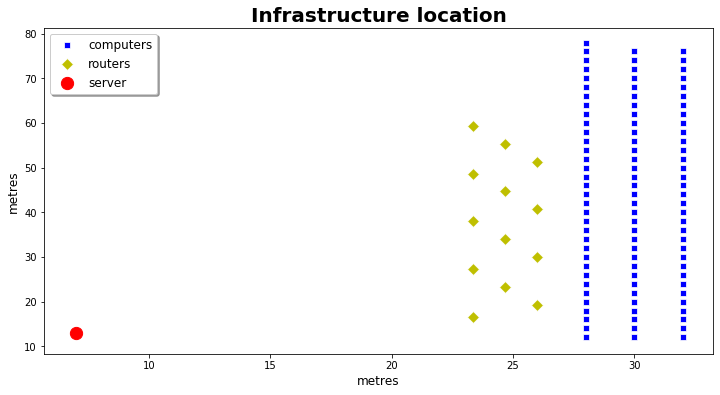

In [113]:
#Vizualize 
plt.figure(figsize = (12,6))
sns.scatterplot(x=computers_location.T[0], y=computers_location.T[1], color = 'b', label = "computers",marker="s")
sns.scatterplot(x=routers_location.T[0], y=routers_location.T[1], color = 'y', label = "routers", s=70, marker="D")
plt.scatter(server_location[0], server_location[1], color = 'r', label = "server", s=150)
plt.title("Infrastructure location", fontweight='bold', fontsize= 20 )
plt.legend(shadow=True, fontsize= 12)
plt.xlabel("metres",fontsize= 12)
plt.ylabel("metres",fontsize= 12)
plt.show()

In [144]:
PC_router_price = 0
router_server_price = 0

#the price for the router to server section
for x,y in routers_location:
    distance = np.sqrt(((server_location[0]-x)**2)+((server_location[1]-y)**2))
    router_server_price += distance * optical_fiber_price

#the price for the router to computers section
i = 0 
for x,y in routers_location:
    for x_r, y_r in computers_location:
        i+=1
        
        if i % routers_ports_number == 0:
            distance = np.sqrt(((x_r-x)**2) + ((y_r-y)**2))
            PC_router_price += distance * t_wire_price
            break
        distance = np.sqrt(((x_r-x)**2) + ((y_r-y)**2))
        PC_router_price += distance * t_wire_price  

price_with_routers = PC_router_price + router_server_price        
        
print(f'Итоговая цена для решения с использованием маршрутизаторов = {round(price_with_routers)} руб.')

Итоговая цена для решения с использованием маршрутизаторов = 82292.0 руб.


In [145]:
best = np.minimum(price_without_routers, price_with_routers) 
print(f'Победило решение №2 с итоговой ценой {round(best,0)}')

Победило решение №2 с итоговой ценой 82292.0
